# Kinect vs. Vicon


**Vicon & Kinect data obtained by post stroke volunteer while playing a Serius Game.**

>*By KOBYLARZ, J in partnership with PUCPR*



##Kinect

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data from computer using colab functions.

from google.colab import files
uploaded = files.upload()

kinect_df = pd.read_csv("AVC2_cabeceio01_08_11_Kinect.csv")
kinect_df.head()

Saving AVC2_cabeceio01_08_11_Kinect.csv to AVC2_cabeceio01_08_11_Kinect.csv


,Angulacao_de_tronco,Bola_foi_lancada,Bola_pega
0,0.00,0,0
1,-17.57,0,0
2,-17.57,0,0
3,-7.79,0,0
4,-7.79,0,0


In [3]:
#Shape of my df
kinect_df.shape

(1881, 3)

In [4]:
kinect_df.keys()

Index(['Angulacao_de_tronco', ' Bola_foi_lancada', ' Bola_pega'], dtype='object')

In [0]:
kinect_df.columns = ['Angle','Throw','Catch']

In [6]:
kinect_df.keys()

Index(['Angle', 'Throw', 'Catch'], dtype='object')

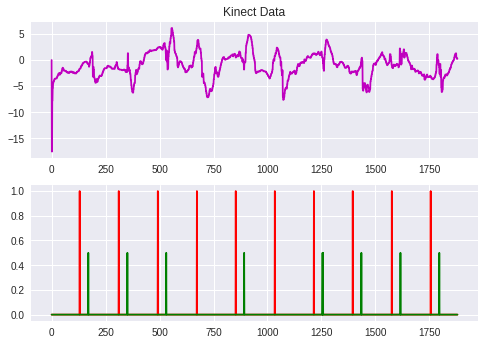

In [7]:
#Graph

angulo = kinect_df['Angle']
lancamento = kinect_df['Throw']
pega_bola = kinect_df['Catch'] * 0.5

plt.subplot(2,1,1)
plt.plot(angulo, c = 'm')
plt.title('Kinect Data')
plt.show

plt.subplot(2, 1, 2)
plt.plot(lancamento, c ='r')
plt.plot(pega_bola, c = 'g') 
plt.show()


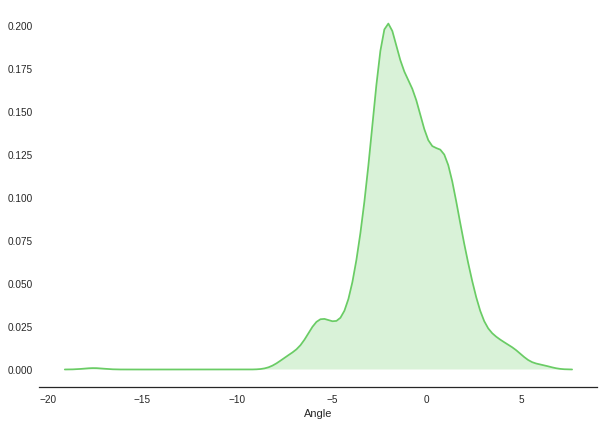

In [8]:
#Different visualization

sns.set(style="white", palette="muted", color_codes=True)

f, axes= plt.subplots(figsize=(10, 7), sharex=True)
sns.despine(left=True)

Angle = kinect_df['Angle']

sns.distplot(Angle, hist=False, color="g", kde_kws={"shade": True})



---



##Vicon

In [9]:
#Import and showing head of Kinect data
from google.colab import files
uploaded = files.upload()

#Import Vicon data
vicon_df = pd.read_csv("cabeceio_vicon.csv")

Saving cabeceio_vicon.csv to cabeceio_vicon.csv


In [10]:
vicon_df.head()

,Frame,Angle
0,500,1.829613
1,501,1.833162
2,502,1.820403
3,503,1.810658
4,504,1.822264


In [11]:
#Fist of all, lets rename our columns (Highlights)
vicon_df.columns

Index(['Frame', 'Angle'], dtype='object')

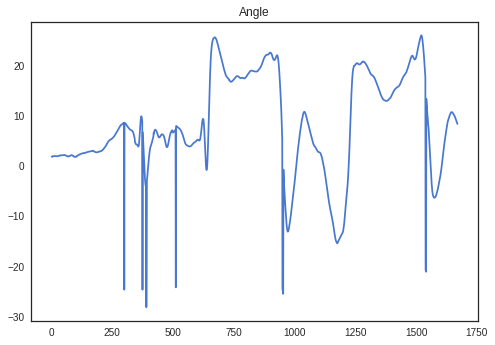

In [21]:
#Graph for the Vicon df

f1 = vicon_df['Angle']

plt.plot(f1, c = 'b')

plt.title('Angle')
plt.show()





---



##Math

Cross correlation test

In [0]:
# Cross-correlation (cc)
# angle = Kinect angle and f1 = angles of Vicon hightlighter  
cc_angle_f1 = np.correlate(angulo, f1)



In [19]:
cc_angle_f1

array([ -6614.32418668,  -6703.90424511,  -6787.17714853,  -6851.33092649,
        -6938.78772045,  -7061.42924941,  -7160.21394096,  -7297.46504026,
        -7416.22352755,  -7560.73981035,  -7693.29186246,  -7839.42421807,
        -7994.49966489,  -8206.36532696,  -8357.03038378,  -8569.5848464 ,
        -8790.57182297,  -9056.60818432,  -9295.92020625,  -9548.02705193,
        -9772.43298327, -10004.50646068, -10329.9358736 , -10602.87595689,
       -10812.00404192, -11101.26436444, -11369.06621732, -11691.38433873,
       -12011.16660946, -12286.4525778 , -12611.55265378, -12872.78073165,
       -13141.75084516, -13424.52408278, -13702.41149442, -13997.56709042,
       -14292.38249789, -14577.1235929 , -14858.38322909, -15154.14872999,
       -15489.76323031, -15776.39545055, -16091.52415742, -16381.94756804,
       -16715.52878228, -16974.96889469, -17243.90839241, -17478.04851398,
       -17678.84160655, -17886.08111146, -18045.52812595, -18229.8591725 ,
       -18413.98448893, -

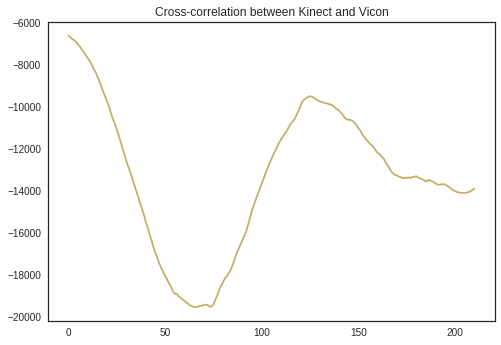

In [20]:
#Plot of Cross-correlation tests

plt.plot(cc_angle_f1, c = 'y')
plt.title('Cross-correlation between Kinect and Vicon')

fig1.subplots_adjust(hspace=0.5)

plt.show()
